In [2]:
import torch
from torchvision import datasets, transforms
import helper


Load dataset ( training , testing ) 

In [3]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|████████████████▉| 26312704/26421880 [00:16<00:00, 1636477.65it/s]

Extracting C:\Users\ashrafatef/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\ashrafatef/.pytorch/F_MNIST_data/FashionMNIST\raw



0it [00:00, ?it/s]
32768it [00:00, 93878.75it/s]                                          


Extracting C:\Users\ashrafatef/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\ashrafatef/.pytorch/F_MNIST_data/FashionMNIST\raw



0it [00:00, ?it/s]
 98%|██████████████████▌| 4325376/4422102 [00:02<00:00, 1729169.61it/s]

Extracting C:\Users\ashrafatef/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\ashrafatef/.pytorch/F_MNIST_data/FashionMNIST\raw




0it [00:00, ?it/s]

8192it [00:00, 38532.89it/s]                                           


Extracting C:\Users\ashrafatef/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\ashrafatef/.pytorch/F_MNIST_data/FashionMNIST\raw
Processing...
Done!


26427392it [00:29, 1636477.65it/s]                                     
4423680it [00:22, 1729169.61it/s]                                      

Show Single Image in dataset 

In [19]:
image, label = next(iter(trainloader))
# helper.imshow(image[0,:]);
image[0,:].shape[0]

1

Build My Network 

In [21]:
from torch import nn  
import torch.nn.functional as F

In [40]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.L1 = nn.Linear(784,128)
        self.L2 = nn.Linear(128,256)
        self.L3 = nn.Linear(256,512)
        self.L4 = nn.Linear(512,10)
    
    def forward(self, x):
        
        x = x.view(x.shape[0], -1)
        
        x = self.L1(x)
        x = F.relu(x)
        x = self.L2(x)
        x = F.relu(x)
        x = self.L3(x)
        x = F.relu(x)
        x = self.L4(x)
        x = F.log_softmax(x,dim=1)
        
        return x 

In [41]:
model = Network()

In [42]:
model

Network(
  (L1): Linear(in_features=784, out_features=128, bias=True)
  (L2): Linear(in_features=128, out_features=256, bias=True)
  (L3): Linear(in_features=256, out_features=512, bias=True)
  (L4): Linear(in_features=512, out_features=10, bias=True)
)

In [70]:
from torch import optim

In [71]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [72]:
epochs = 10 
loss_epoch_arr = []
for e in range(epochs):
    
    running_loss = 0 
    for images, labels in trainloader:
        
        logs = model(images)
        
        loss = criterion(logs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}") 
    loss_epoch_arr.append(loss.item()) 

Training loss: 0.24229043645303705
Training loss: 0.23413765610360515
Training loss: 0.2304888737640147
Training loss: 0.22323307004580492
Training loss: 0.2288029206706199
Training loss: 0.22180597015471856
Training loss: 0.2138360373969716
Training loss: 0.22057644556214942
Training loss: 0.21212755020128002
Training loss: 0.2085725283389216


In [73]:
def evaluation(dataloader):
    total, correct = 0, 0
    #keeping the network in evaluation mode 
    model.eval()
    for data in dataloader:
        inputs, labels = data
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [74]:
print('Test acc: %0.2f' % (evaluation(testloader)))

Test acc: 88.10


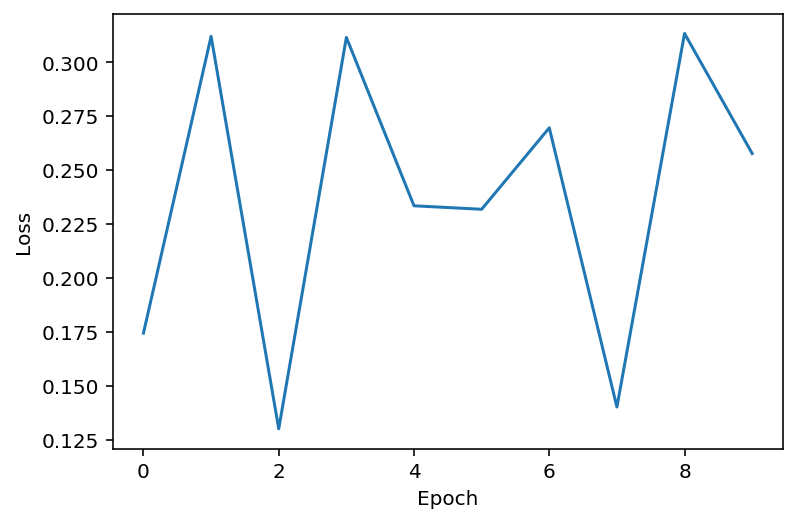

In [75]:
import matplotlib.pyplot as plt
plt.plot(loss_epoch_arr)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

tensor(0)
tensor([[9.0302e-01, 1.9233e-05, 1.9202e-03, 6.0582e-03, 6.4650e-05, 2.0203e-08,
         8.8909e-02, 4.0498e-18, 1.0094e-05, 8.5706e-12]],
       grad_fn=<ExpBackward>)


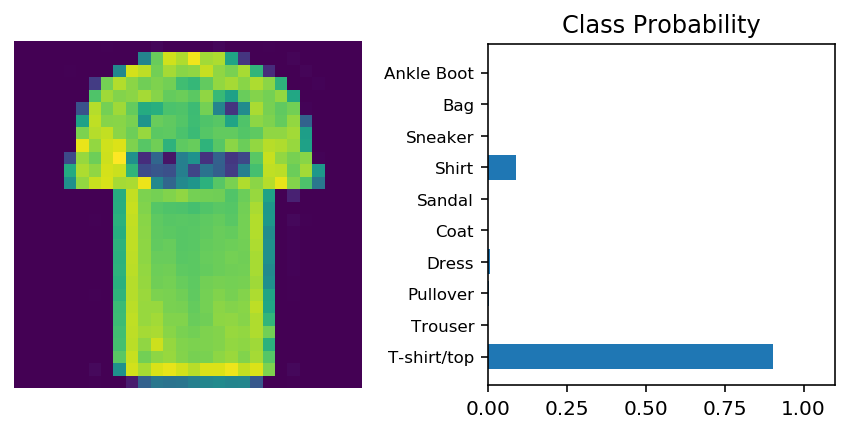

In [64]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
print(labels[0])
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

print(ps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')